# <font color='brown'>楼 + 机器学习实战</font>

# 挑战：小麦种子层次聚类及绘制二叉树

## 挑战介绍

本次挑战将针对小麦种子数据集进行层次聚类，并绘制层次聚类二叉树图像。

## 挑战知识点

- 层次聚类
- 层次聚类二叉树图像

---

## 挑战内容

### 数据集介绍

本次挑战将用的小麦种子数据集，该数据集由若干小麦种子的几何参数组成，共包含有 7 个维度。这些维度有：种子面积、种子周长、种子致密度、核仁长度、核仁宽度、种子不对称系数、核沟长度。 

你可以下载并加载预览该数据集： 

In [1]:
# !wget http://labfile.oss.aliyuncs.com/courses/1081/challenge-8-seeds.csv

In [2]:
import pandas as pd
df = pd.read_csv("challenge-8-seeds.csv")
df.head()

,f1,f2,f3,f4,f5,f6,f7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


可以看到，数据集从 f1-f7 代表 7 种特征。下面，我就要通过层次聚类方法完成对该种子数据集的聚类，从而估计出数据集到底采集了几种类别的小麦种子。

### 层次聚类

前面的实验中，我们学习了如何实现一个自底向上的层次聚类算法，并了解通过 scikit-learn 完成层次聚类。这次的挑战中，我们将尝试通过 Scipy 完成，Scipy 作为知名的科学计算模块也同样提供了层次聚类的方法。

---

**<font color='red'>挑战</font>：使用 Scipy 中的 Agglomerative 聚类（自底向上层次聚类算法）方法完成小麦种子层次聚类。**

**<font color='blue'>规定</font>**：使用 `ward` 离差平方和法度量相似度，距离计算使用欧式距离。

**<font color='green'>提示</font>**：Scipy 中的 Agglomerative 聚类方法类为 `scipy.cluster.hierarchy.linkage()`，阅读[官方文档](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage)。

- hierarchy: `/ˈhaɪ.rɑːr.ki/` 等级制度
- Agglomerative `/ə'glɒməˌreɪtɪv/` 成团的。

In [3]:
from scipy.cluster import hierarchy

### 代码开始 ### (≈ 1 行代码)
Z = hierarchy.linkage(df, method ='ward', metric='euclidean')
### 代码结束 ###

**运行测试：**

In [4]:
Z[:5]

array([[1.72000000e+02, 2.06000000e+02, 1.17378192e-01, 2.00000000e+00],
       [1.48000000e+02, 1.98000000e+02, 1.33858134e-01, 2.00000000e+00],
       [1.22000000e+02, 1.33000000e+02, 1.35824740e-01, 2.00000000e+00],
       [7.00000000e+00, 2.80000000e+01, 1.79010642e-01, 2.00000000e+00],
       [1.37000000e+02, 1.38000000e+02, 1.91444744e-01, 2.00000000e+00]])

**期望输出：**

<div class="output_subarea output_text output_result">
<pre>array([[1.72000000e+02, 2.06000000e+02, 1.17378192e-01, 2.00000000e+00],
       [1.48000000e+02, 1.98000000e+02, 1.33858134e-01, 2.00000000e+00],
       [1.22000000e+02, 1.33000000e+02, 1.35824740e-01, 2.00000000e+00],
       [7.00000000e+00, 2.80000000e+01, 1.79010642e-01, 2.00000000e+00],
       [1.37000000e+02, 1.38000000e+02, 1.91444744e-01, 2.00000000e+00]])</pre></div>

你会发现，Scipy 中的 linkage 方法会返回一个 Nx4 的矩阵（上面的期望输出为前 5 行）。该矩阵其实包含了每一步合并类别的信息，以第一行举例：

`[1.72000000e+02, 2.06000000e+02, 1.17378192e-01, 2.00000000e+00]` 表示 `172` 类别和 `206` 类别被合并，当前距离为 `1.17378192e-01` 属于全集合最短距离，合并后类别中包含有 `2` 个数据样本。


也就是说 Scipy 把整个层次聚类的过程都呈现出来了，这一点对于理解层次聚类是非常有帮助的。除此之外，Scipy 还集成了一个绘制层次聚类二叉树的方法`dendrogram`。接下来，就尝试使用它来绘制出上面聚类的层次树。

---

**<font color='red'>挑战</font>：使用 Scipy 中的 dendrogram 方法绘制小麦种子层次聚类二叉树。**

**<font color='green'>提示</font>**：Scipy 中绘制层次聚类二叉树的方法为 `scipy.cluster.hierarchy.dendrogram()`，阅读[官方文档](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)。本次挑战使用默认参数即可。

- dendrogram `dendrəgræm` 树枝状图；树形图；树状图

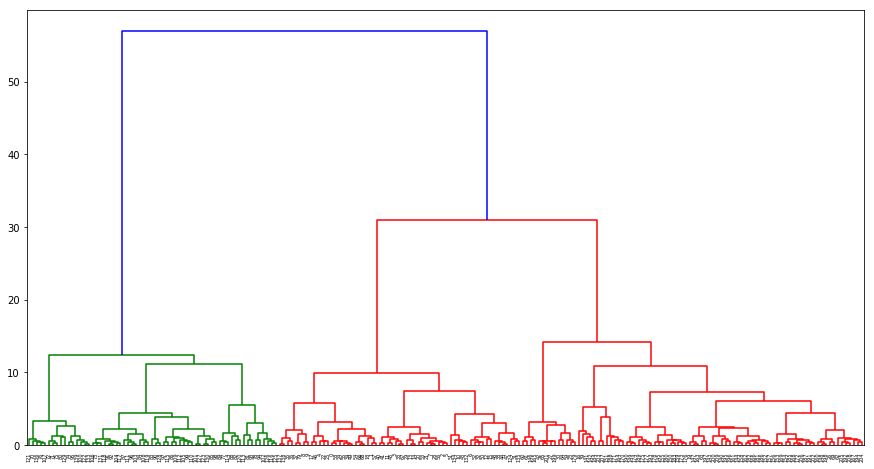

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 8))
### 代码开始 ### (≈ 1 行代码)
hierarchy.dendrogram(Z)
### 代码结束 ###
plt.show()

**期望输出：**

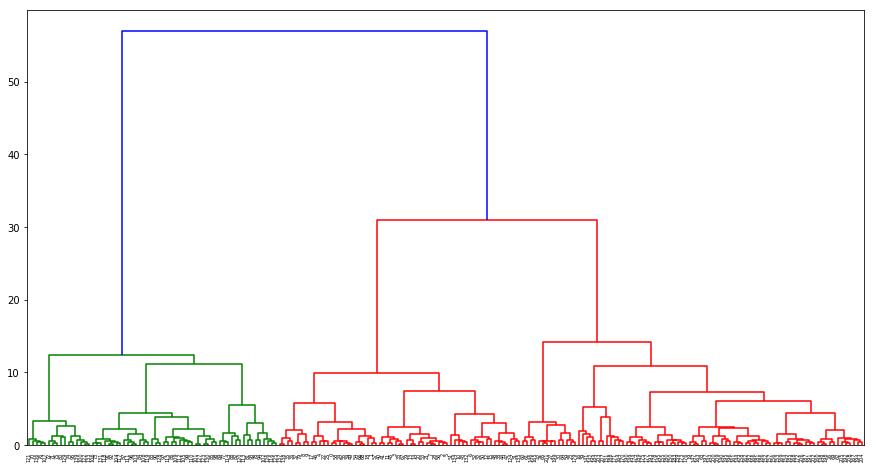

层次聚类二叉树中，$x$ 轴代表数据点原类别，也就是样本序号，而 $y$ 轴表示类别之间的距离。

特别地，图中的横线所在高度表明类别间合并时的距离。如果相邻两横线的间距越大，则说明前序类别在合并时的距离越远，也就表明可能并不属于一类不需要被合并。

上图中蓝色线所对应的 $y$ 差值最大，即说明红色和绿色两个分支很有可能不属于一类。

### 修剪层次聚类二叉树

上面，我们使用 `dendrogram()` 来绘制二叉树。你会发现当样本数量越多时，叶节点就越密集，最终导致通过二叉树辨识不同类别的可视性降低。

其实，你可以指定多个参数来修剪完整的二叉树结果，让其具备更好地观赏性。

---

**<font color='red'>挑战</font>：对小麦种子层次聚类二叉树进行修剪。**

**<font color='green'>提示</font>**：修改参数 `truncate_mode`, `p`, `show_leaf_counts`, `show_contracted`。

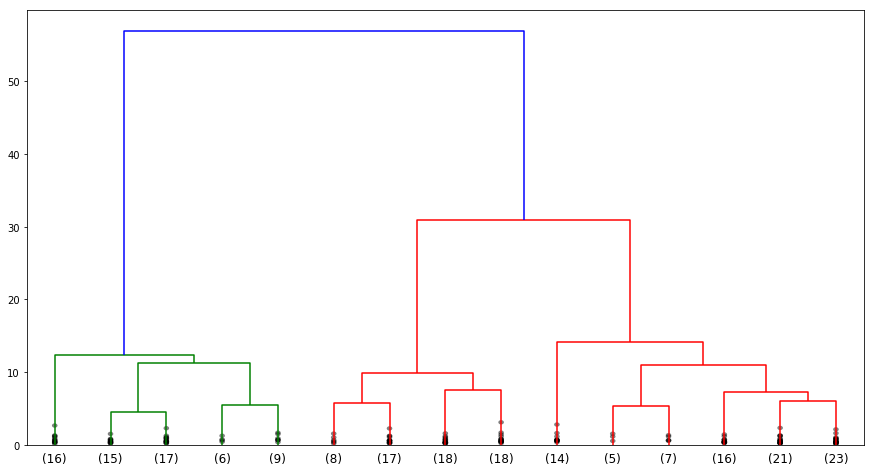

In [6]:
plt.figure(figsize=(15, 8))
### 代码开始 ### (≈ 1 行代码)
hierarchy.dendrogram(Z, truncate_mode='lastp', p=15, show_leaf_counts=True, show_contracted=True)
### 代码结束 ###
plt.show()

**期望输出：**

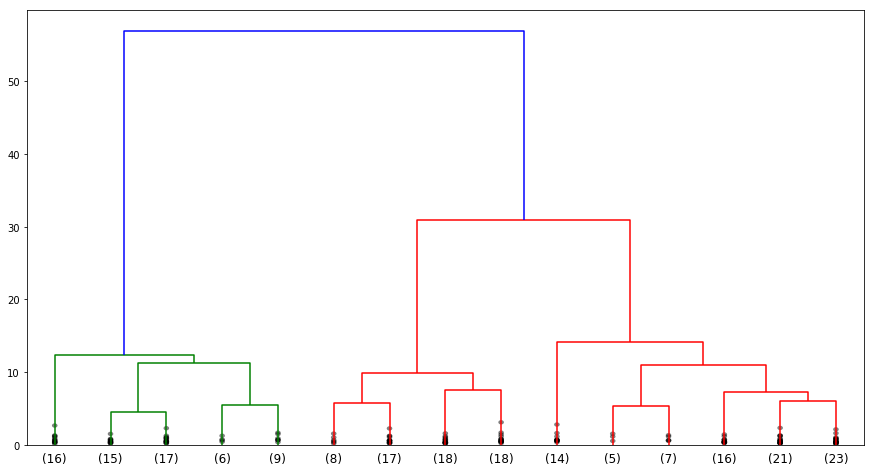

此时的二叉树看起来就更美观了。那么，本次挑战中到底判定小麦种子大致为几类呢？下面通过层次聚类二叉树给出建议：

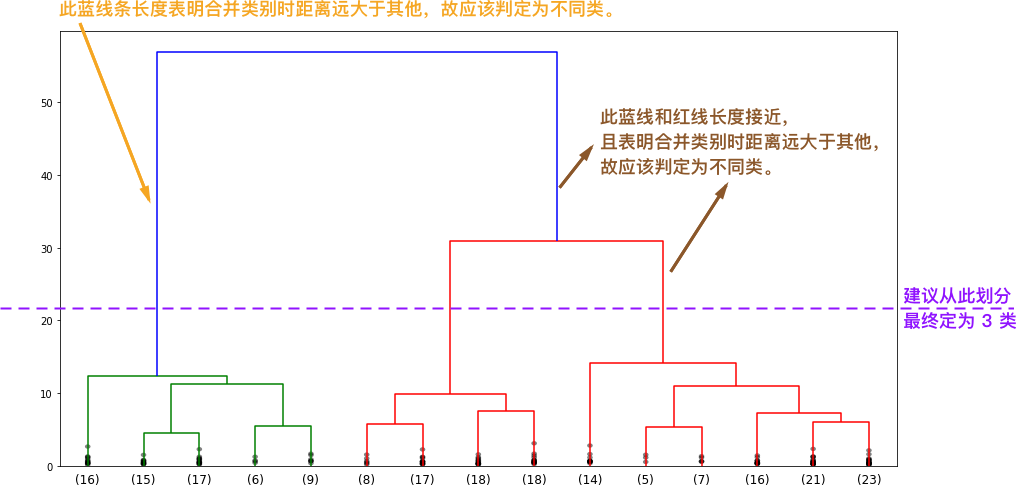</img>

所以，最终建议将小麦种子数据集划为 3 类，也就是其中包含 3 种不同品种的小麦籽粒。

---

<div style="color: #999;font-size: 12px;font-style: italic;">*本课程内容，由作者授权实验楼发布，未经允许，禁止转载、下载及非法传播。</div>